<a href="https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/imdb_movie_reviews_classification_dense_layers_regularization_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMBD movie reviews dataset

## Loading the IMBD dataset

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

TensorFlow 2.x selected.
17465344/17464789 [==============================] - 0s 0us/step


See [https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) for all more details.

## Preparing the data

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Create validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Build, compile, train, and analyze models

**Reference model**

In [0]:
# reference model
model_0 = tf.keras.models.Sequential()
model_0.add(tf.keras.layers.Input(shape=(10000)))
model_0.add(tf.keras.layers.Dense(16, activation='relu'))
model_0.add(tf.keras.layers.Dense(16, activation='relu'))
model_0.add(tf.keras.layers.Dense(1, activation='sigmoid'))

**Regularization**

In [0]:
# regularization
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Input(shape=(10000)))
model_1.add(tf.keras.layers.Dense(16, 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                  activation='relu'))
model_1.add(tf.keras.layers.Dense(16, 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                  activation='relu'))
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
# dropout
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Input(shape=(10000)))
model_2.add(tf.keras.layers.Dense(16, 
                                  activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.5))
model_2.add(tf.keras.layers.Dense(16, 
                                  activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.5))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
models = [model_0, model_1, model_2]

In [0]:
def compile_model(model):
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [0]:
for model in models:
    compile_model(model)

In [0]:
def fit_model(model):
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        verbose=0,
                        validation_data=(x_val, y_val))
    return history

In [0]:
histories = [] 
for model in models:
    histories.append(fit_model(model))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def show_learning_curves(history, i):
    pd.DataFrame(history.history).plot(figsize=(10, 5))
    plt.title(f'model {i}')
    plt.grid(True)

    plt.gca().set_ylim(0, 1.1) 
    plt.gca().set_xlim(0, 19)

    plt.gca().xaxis.set_major_locator(MultipleLocator(2))

    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
    plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

    plt.show()

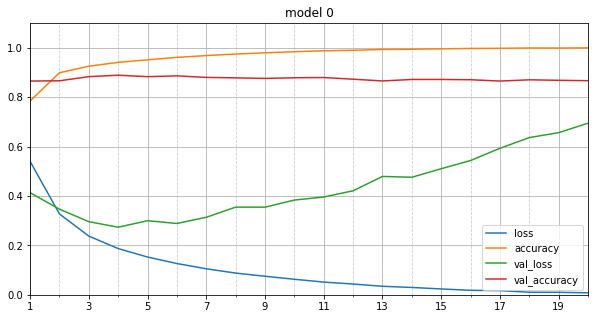

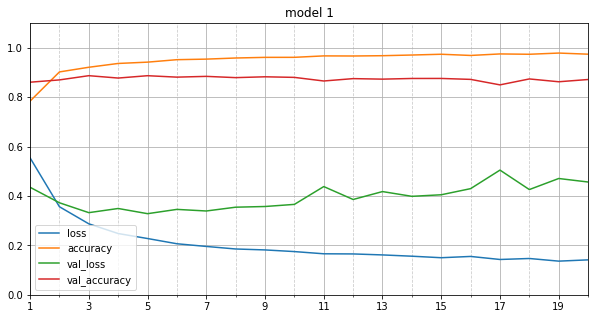

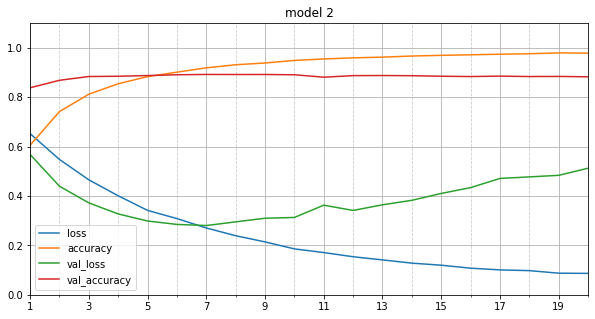

In [13]:
for i, history in enumerate(histories):
    show_learning_curves(history, i)